**Name:** _Marcel Damas_   
**E-Mail:** _marcel-spanien@hotmail.de_ 
  
# <u>Making business decisions based on data</u>

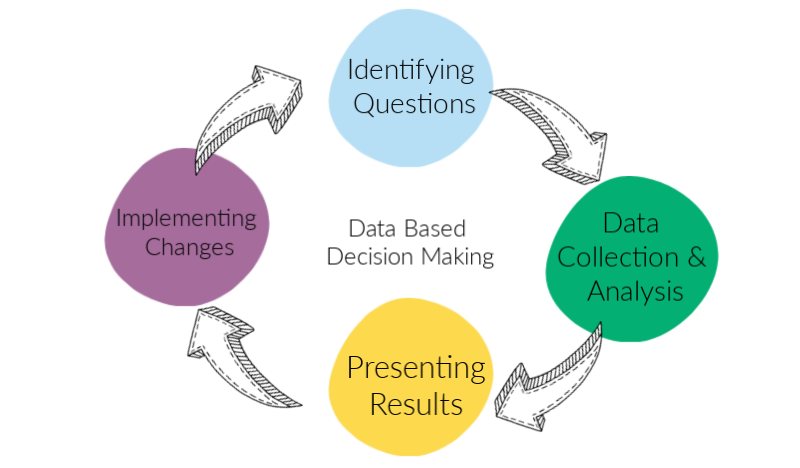


## Project goal   

it is to filter out the important hypotheses and separate them from the less important. In addition, we will do an ab test to test the percentiele calculate the hypotheses and draw conclusions.  
   
<a name="table_of_contents"></a> 

## Table of contents  


Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
The task is to:

   * Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.[click here](#Step_1) 
   * Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.[click here](#Step_1.1) 
   * Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.[click here](#Step_1.2) 

Part 2. A/B Test Analysis
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   1. Graph cumulative revenue by group. Make conclusions and conjectures.[click here](#Step_2.1) 
   2. Graph cumulative average order size by group. Make conclusions and conjectures.[click here](#Step_2.2) 
   3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.[click here](#Step_2.3) 
   4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.[click here](#Step_2.4)
   5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.[click here](#Step_2.5) 
   6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.[click here](#Step_2.6) 
   7. Plot a scatter chart of order prices. Make conclusions and conjectures.[click here](#Step_2.7) 
   8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.[click here](#Step_2.8) 
   9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.[click here](#Step_2.9) 
   10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.[click here](#Step_2.10) 
   11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.[click here](#Step_2.11) 
   12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.[click here](#Step_2.12) 
   13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.[click here](#Step_2.13)

In [44]:
!pip install pandas -U --quiet
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [45]:
print(pd.__version__)
print(np.__version__)

1.4.0
1.20.3


In [46]:
try:
    hypote = pd.read_csv('hypotheses_us.csv')
except:
    hypote = pd.read_csv('/datasets/hypotheses_us.csv')
print(hypote)

           Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...
5  Add a customer review page. This will increase...
6  Show banners with current offers and sales on ...
7  Add a subscription form to all the main pages....
8  Launch a promotion that gives users discounts ...


In [47]:
hypote.info

<bound method DataFrame.info of            Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...
5  Add a customer review page. This will increase...
6  Show banners with current offers and sales on ...
7  Add a subscription form to all the main pages....
8  Launch a promotion that gives users discounts ...>

In [48]:
try:
    hypoteses = pd.read_csv('hypotheses_us.csv',dtype={'Hypothesis': 'category'}, sep=';')
    orders = pd.read_csv('orders_us.csv', parse_dates=['date'])
    visits = pd.read_csv('visits_us.csv', parse_dates=['date'])
except:
    hypoteses = pd.read_csv('/datasets/hypotheses_us.csv',dtype={'Hypothesis': 'category'}, sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])
    visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])#dtype={'group': 'category'},
display(hypoteses)
display(orders)
display(visits)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [49]:
print("Missing values:")
print(hypoteses.isnull().sum())
print()
print("Missing values:")
print(hypoteses.duplicated().sum())

Missing values:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

Missing values:
0


In [50]:
hypoteses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Hypothesis  9 non-null      category
 1   Reach       9 non-null      int64   
 2   Impact      9 non-null      int64   
 3   Confidence  9 non-null      int64   
 4   Effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 797.0 bytes


<a name="Step_1"></a>
Part 1. Prioritizing Hypotheses The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. The task is to:

   * Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
   
   Back to the table of contents [click here](#table_of_contents)   

In [51]:
hypoteses['ICE']= (hypoteses['Impact']*hypoteses['Confidence'])/hypoteses['Effort']
print(hypoteses[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


<a name="Step_1.1"></a>
Part 1. Prioritizing Hypotheses The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. The task is to:

   * Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
   
   Back to the table of contents [click here](#table_of_contents)   

In [52]:
hypoteses['RICE']= (hypoteses['Reach']*hypoteses['Impact']*hypoteses['Confidence'])/hypoteses['Effort']
print(hypoteses[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [53]:
print(hypoteses[['Hypothesis','ICE','RICE']].sort_values(by='RICE',ascending=False))

                                          Hypothesis        ICE   RICE
7  Add a subscription form to all the main pages....  11.200000  112.0
2  Add product recommendation blocks to the store...   7.000000   56.0
0  Add two new channels for attracting traffic. T...  13.333333   40.0
6  Show banners with current offers and sales on ...   8.000000   40.0
8  Launch a promotion that gives users discounts ...  16.200000   16.2
3  Change the category structure. This will incre...   1.125000    9.0
1  Launch your own delivery service. This will sh...   2.000000    4.0
5  Add a customer review page. This will increase...   1.333333    4.0
4  Change the background color on the main page. ...   1.000000    3.0


<a name="Step_1.2"></a>
Part 1. Prioritizing Hypotheses The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. The task is to:

   * Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

   Back to the table of contents [click here](#table_of_contents)  

The difference between the two prioritization methods lies in what we are looking at.With ICE, we value impact, confidence and effort, and with RICE, Reach is added, as factored into the prioritization methods, so it shows an additional parameter. This of course also changes the priority list. 

<a name="Step_2.1"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   1. Graph cumulative revenue by group. Make conclusions and conjectures.
   
      Back to the table of contents [click here](#table_of_contents)  

In [54]:
cumulative_revenue=orders.groupby('group').agg({'revenue':'sum'})
display(cumulative_revenue)

,revenue
group,
A,64554.9
B,92840.6


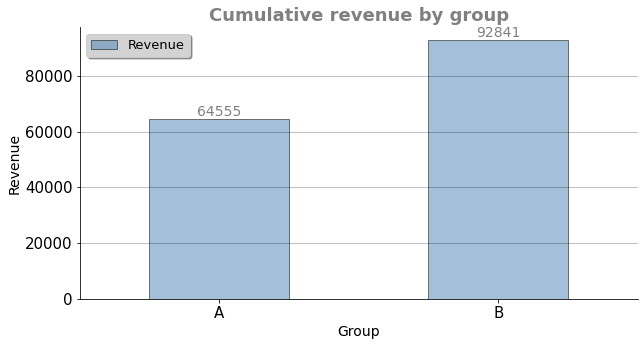

In [55]:
ax=cumulative_revenue.plot(kind='bar',figsize=(10,5),alpha=0.5,label='cumulative revenue',
  rot=360,edgecolor = 'black',color='steelblue');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc="best")
plt.title("Cumulative revenue by group",fontdict={'size':18},weight='bold',color = 'gray');
plt.xlabel("Group",fontdict={'size':14});
plt.ylabel("Revenue",fontdict={'size':14} );
plt.legend(loc="best")
plt.legend(['Revenue'],loc="upper left",prop = {'size' : 13}, shadow = True, facecolor = 'lightgray')
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)
for item in ax.patches:
    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 0),  
            textcoords="offset points",
            ha='center', va='bottom',size='14',color='gray')
plt.show()

**Conclusion**   

If you put them on it looks like group A will bring less income this can have many reasons that lead to this result. 

In [56]:
datesGroups = orders[['date','group']].drop_duplicates()
display(datesGroups)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [57]:
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
orders['group'] == x['group'])].agg({'date' : 'max', 
'group' : 'max',
'transactionId' : pd.Series.nunique, 
'visitorId' : pd.Series.nunique, 
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [58]:
display(visits)
display(orders)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [59]:
visitorsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

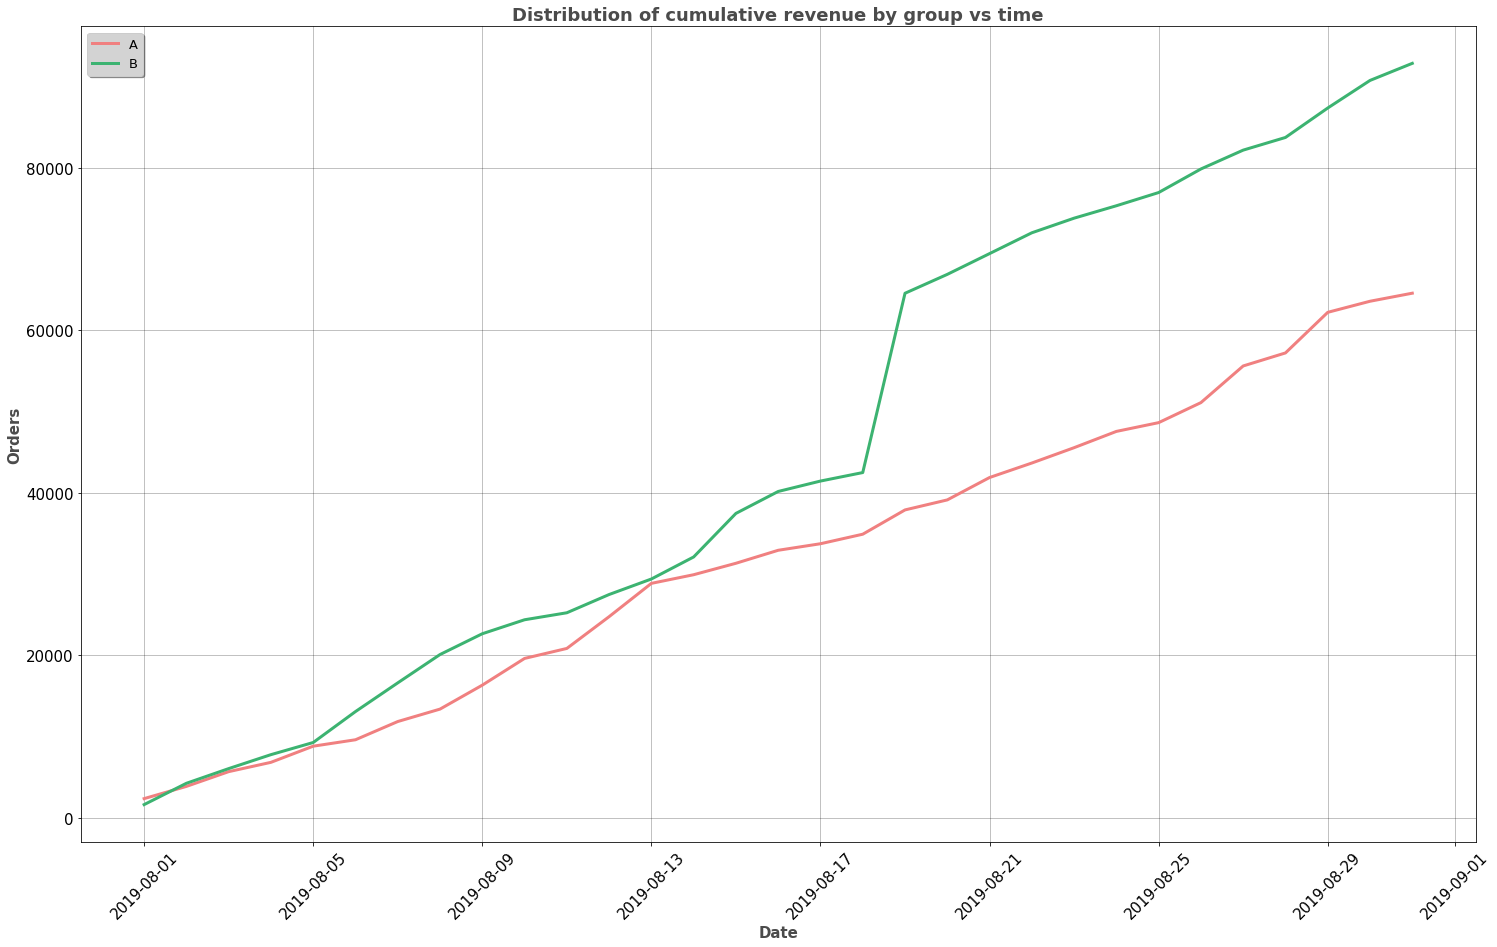

In [60]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A',linewidth=3,color='lightcoral')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B',linewidth=3,color='mediumseagreen')
plt.title("Distribution of cumulative revenue by group vs time",fontdict={'size':18},weight='bold',alpha=0.7)
plt.xlabel("Date",fontdict={'size':15},weight='bold',alpha=0.7)
plt.ylabel("Orders",fontdict={'size':15},weight='bold',alpha=0.7)
plt.rc("font", size=15)
plt.legend(ncol=3);
plt.xticks(rotation=45)#to avoid overlapping of the labels
plt.rcParams['figure.figsize'] = [25, 15] 
plt.legend(loc="upper left",prop = {'size' : 13}, shadow = True, facecolor = 'lightgray')
plt.grid(color='black', lw = 0.8, alpha=0.3)

**Conclusion**

Group B takes the lead, it looks like large orders are the cause. we need to get rid of these for our final analysis. 

<a name="Step_2.2"></a>

**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv. Task Analyze the A/B test:

   2. Graph cumulative average order size by group. Make conclusions and conjectures.
    
 Back to the table of contents [click here](#table_of_contents)  

In [61]:
average_order_size=orders.groupby('group').agg({'revenue':'mean'})
average_order_size

,revenue
group,
A,115.897487
B,145.063438


<a name="Step_2.3"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:


   3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
   
   Back to the table of contents [click here](#table_of_contents) 

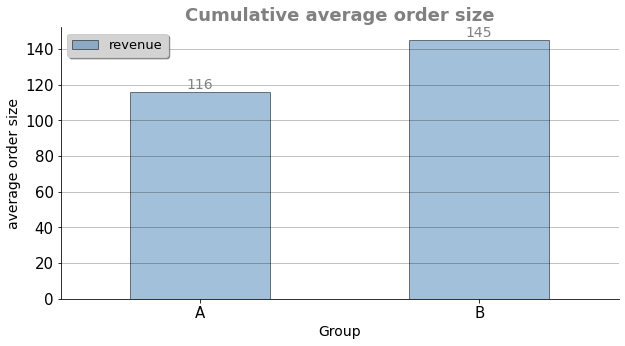

In [62]:
ax=average_order_size.plot(kind='bar',figsize=(10,5),alpha=0.5,label='cumulative revenue',rot=360
  ,edgecolor = 'black',color='steelblue');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc="best")
plt.title("Cumulative average order size",fontdict={'size':18},weight='bold',color = 'gray');
plt.xlabel("Group",fontdict={'size':14});
plt.ylabel("average order size",fontdict={'size':14});
plt.legend(loc="best")
plt.legend(loc="upper left",prop = {'size' : 13}, shadow = True, facecolor = 'lightgray')
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)
for item in ax.patches:
    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 0),  
            textcoords="offset points",
            ha='center', va='bottom',size='14',color='gray')
plt.show()

**Conclusion**

we also see that the average order size A does worse than b this could also be the reason why b does better with cumulative revenue by group so it is not only dependent on the number of orders (that a group has more orders, for example) 

In [63]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

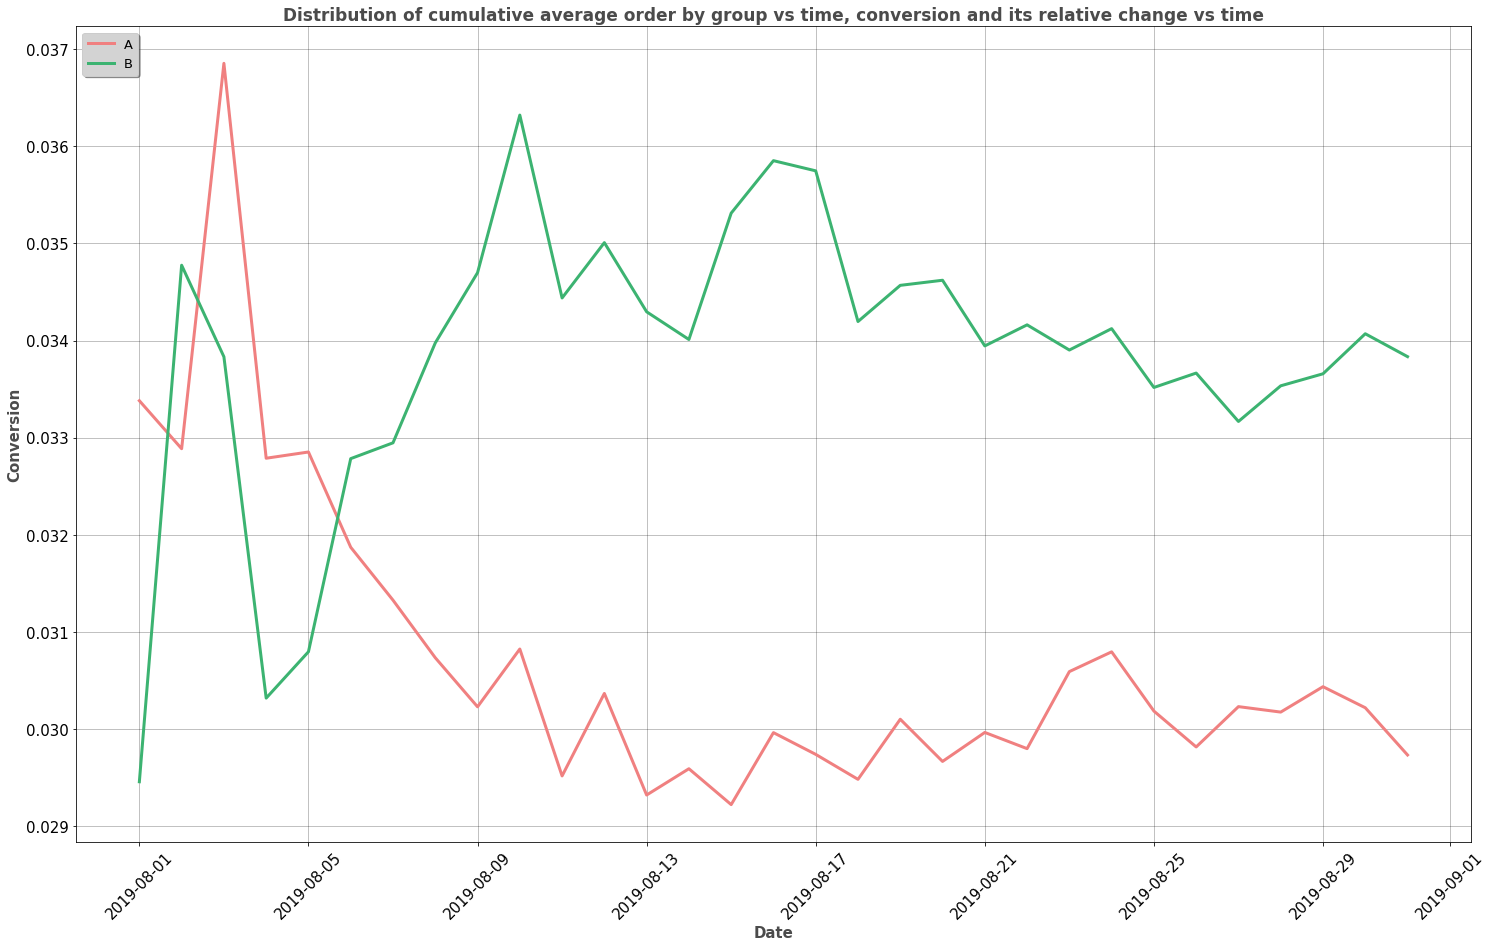

In [64]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']


# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A',linewidth=3,color='lightcoral')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B',linewidth=3,color='mediumseagreen')
plt.legend();
plt.title("Distribution of cumulative average order by group vs time, conversion and its relative change vs time"
          ,fontdict={'size':17},weight='bold',alpha=0.7)
plt.xlabel("Date",fontdict={'size':15},weight='bold',alpha=0.7)
plt.ylabel("Conversion",fontdict={'size':15},weight='bold',alpha=0.7)
plt.xticks(rotation=45)
plt.rc("font", size=15)
plt.legend(ncol=3);
plt.rcParams['figure.figsize'] = [25, 15]
plt.legend(loc="upper left",prop = {'size' : 13}, shadow = True, facecolor = 'lightgray')
plt.grid(color='black', lw = 0.8, alpha=0.3)

**Conclusion of the graph**

At the beginning, group a has A higher conversion rate which rises with an extremely increase to 0.037 but then drops again just as quickly. Shortly after the 2019-08-05 there is an intersection where the two groups meet, and group B takes the lead in the conversion rate, which after a strong upswing and an equally sharp fall changes back into the direction of a steep rise and then stabilizes with relatively smaller fluctuations and now only completely falls off slightly. Group A, on the other hand, keeps falling and stabilizes with fluctuations around a conversion rate of 0.030. 

<a name="Step_2.4" ></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
   
Back to the table of contents [click here](#table_of_contents)

In [65]:
orders_visits=orders.merge(visits, on=['date','group'],how='left')
display(orders_visits)

,transactionId,visitorId,date,revenue,group,visits
0,3667963787,3312258926,2019-08-15,30.4,B,544
1,2804400009,3642806036,2019-08-15,15.2,B,544
2,2961555356,4069496402,2019-08-15,10.2,A,628
3,3797467345,1196621759,2019-08-15,155.1,B,544
4,2282983706,2322279887,2019-08-15,40.5,B,544
...,...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B,746
1193,2203539145,370388673,2019-08-14,50.1,A,735
1194,1807773912,573423106,2019-08-14,165.3,A,735
1195,1947021204,1614305549,2019-08-14,5.5,A,735


In [66]:
conversion_data=orders_visits.groupby(['group','date']).agg({'transactionId':'nunique','visitorId':'nunique','visits':'sum'}).reset_index()
conversion_data['conversion_rate']=conversion_data['transactionId']/conversion_data['visits']
display(conversion_data)

,group,date,transactionId,visitorId,visits,conversion_rate
0,A,2019-08-01,24,20,17256,0.001391
1,A,2019-08-02,20,19,12380,0.001616
2,A,2019-08-03,24,24,12168,0.001972
3,A,2019-08-04,16,15,11472,0.001395
4,A,2019-08-05,25,25,18900,0.001323
...,...,...,...,...,...,...
57,B,2019-08-27,16,16,11520,0.001389
58,B,2019-08-28,28,27,18312,0.001529
59,B,2019-08-29,20,20,10620,0.001883
60,B,2019-08-30,24,24,11760,0.002041


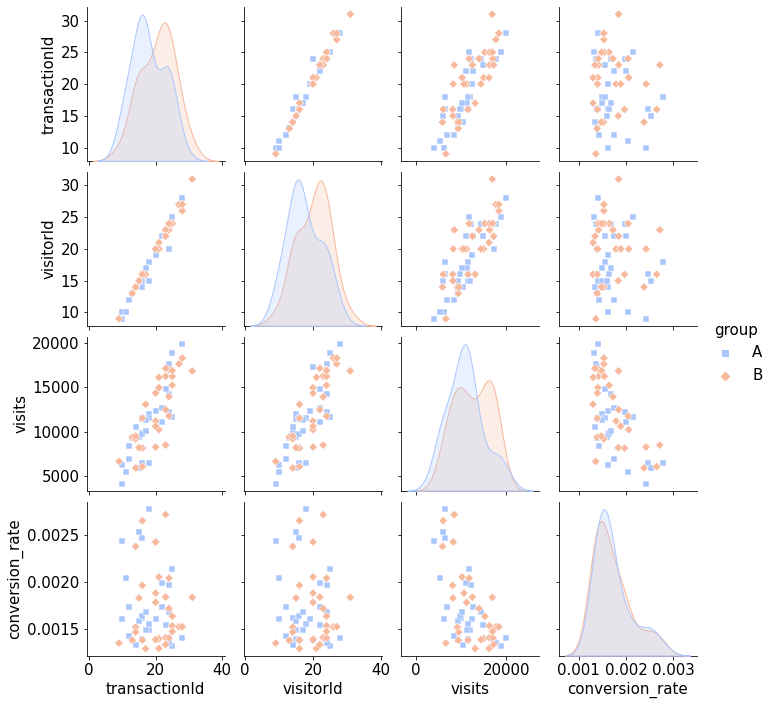

In [67]:
sns.pairplot(conversion_data,hue='group',markers=["s", "D"],palette="coolwarm"); 

**Conclusion**

it looks as if at least every visitor is doing a tranzaction at the same time and on some days we have more transactions than visitors this can only be if we calculate id with a self-running order that no longer requires a visit and still leads to an order. The problem here at this conversion rate would be that we cannot see whether the visitors are also ordering or whether it is a self-running order. 

<a name="Step_2.5"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
   
 Back to the table of contents [click here](#table_of_contents) 

In [68]:
number_of_orders_by_date=orders.groupby(['date','group']).agg({'transactionId':'sum'}).reset_index()
number_of_orders_by_date.rename(columns={'transactionId':'orders'},inplace=True)
display(number_of_orders_by_date.head())

,date,group,orders
0,2019-08-01,A,45146406567
1,2019-08-01,B,54043902441
2,2019-08-02,A,44099518128
3,2019-08-02,B,39896364132
4,2019-08-03,A,40076925084


In [69]:
number_of_user_by_date=orders.groupby(['date','group']).agg({'transactionId':'nunique'}).reset_index()
number_of_user_by_date.rename(columns={'transactionId':'user'},inplace=True)
display(number_of_user_by_date.head())

,date,group,user
0,2019-08-01,A,24
1,2019-08-01,B,21
2,2019-08-02,A,20
3,2019-08-02,B,24
4,2019-08-03,A,24


In [70]:
orders_per_user=number_of_orders_by_date.merge(number_of_user_by_date,on=['date','group'],how='left')
display(orders_per_user.head())

,date,group,orders,user
0,2019-08-01,A,45146406567,24
1,2019-08-01,B,54043902441,21
2,2019-08-02,A,44099518128,20
3,2019-08-02,B,39896364132,24
4,2019-08-03,A,40076925084,24


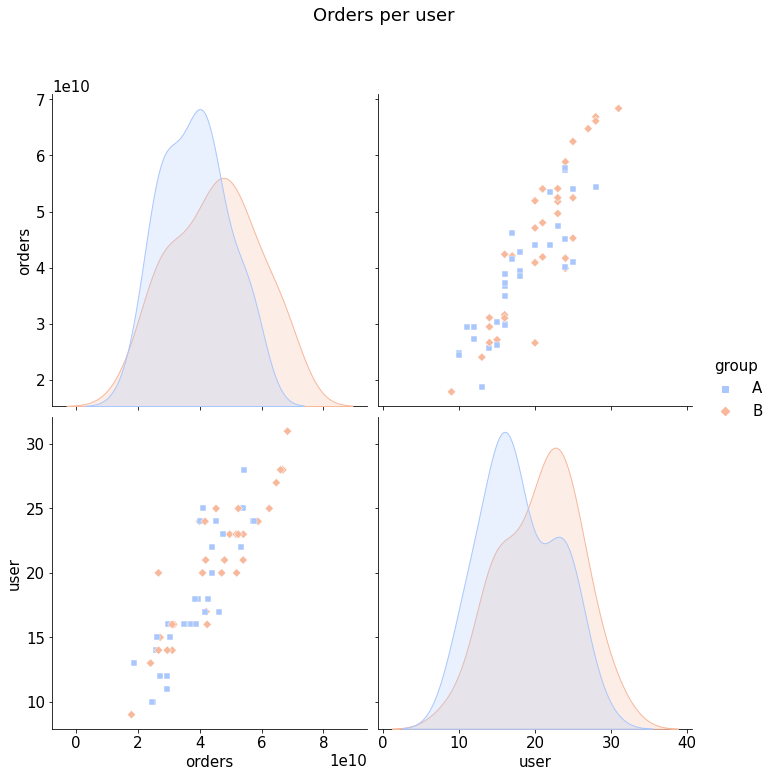

In [71]:
g=sns.pairplot(orders_per_user, hue='group',size=5,markers=["s", "D"],palette="coolwarm");
g.fig.suptitle('Orders per user', y=1.08);

Description of the graph

The graph describes the relationship between groups A and B in relation to the relationship between the orders and users. We see the number of users who have placed 0-7 orders. Group B is shown in orange and group A in blue. We also see the order and order relationship of the two groups and the number of users and the number of users of the two groups. 

-----------------------------------------------------------------------------------------------------------------

In [72]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


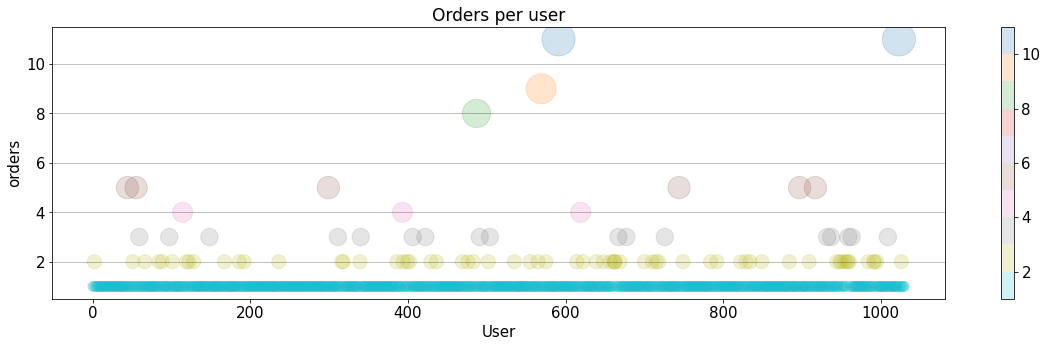

In [73]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(20, 5))
colors = np.array([ordersByUsers['orders']])
sizes = 100* np.array([ordersByUsers['orders']])
plt.scatter(x_values, ordersByUsers['orders'],c=colors, cmap='tab10_r',s=sizes,alpha=0.2)
plt.title("Orders per user",fontdict={'size':17})
plt.xlabel("User",fontdict={'size':15})
plt.ylabel("orders",fontdict={'size':15})
plt.rc("font", size=15)
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)
plt.colorbar()
plt.show()

**Conclusion**

We see that there are a few users who place several orders but most of them make 1 order. 
You can roughly say that the number of orders increases with the number of users. It looks like we have more users in group **B**, which also makes more orders. 

<a name="Step_2.6"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly
   
    Back to the table of contents [click here](#table_of_contents) 

In [74]:
display(np.percentile(ordersByUsers['orders'], [95,99]))

array([2., 4.])

**Conclusion**

Not more than 5% (percentile 95)of users placed more than 2 orders, and 1% (percentile 99) of users made more than 4.
Thus, it would be reasonable to set 2 orders per user as the lower limit for the number of orders and to filter anomalies on that basis.

<a name="Step_2.7"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   7. Plot a scatter chart of order prices. Make conclusions and conjectures.
       
     Back to the table of contents [click here](#table_of_contents) 

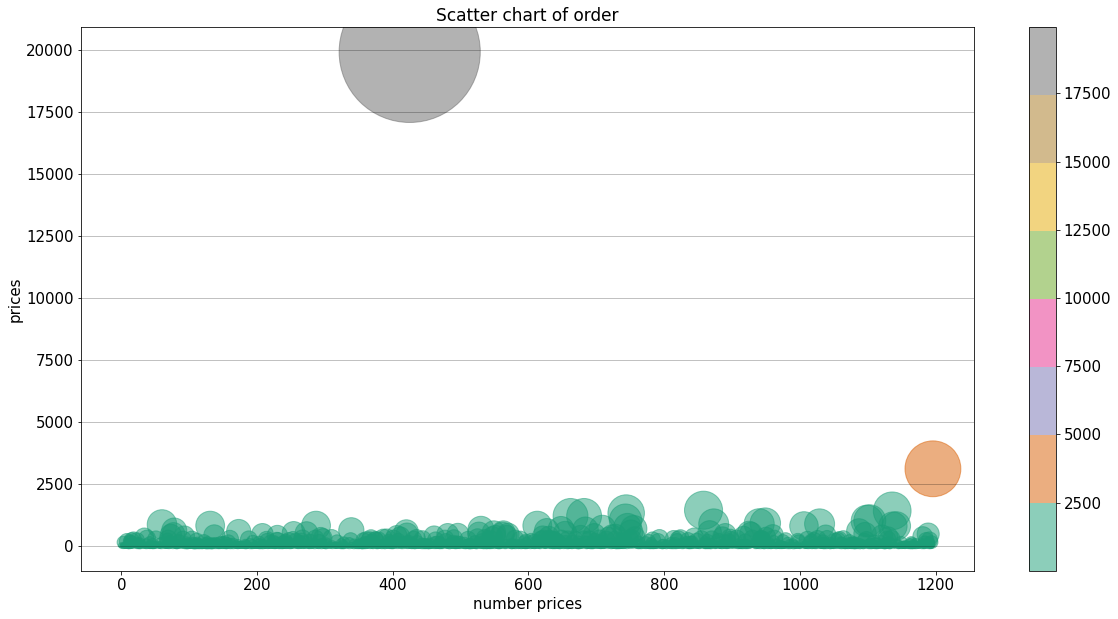

In [75]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20, 10))
colors = np.array([orders['revenue']])
sizes = np.array([orders['revenue']])
plt.scatter(x_values,orders['revenue'],c=colors, cmap='Dark2',s=sizes,alpha=0.5)
plt.title("Scatter chart of order",fontdict={'size':17})
plt.xlabel("number prices",fontdict={'size':15})
plt.ylabel("prices",fontdict={'size':15})
plt.rc("font", size=15)
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)
plt.colorbar()
plt.show()

**Conclusion**

Most prices are below 1000, there are a few outliers that are higher than that, the highest outlier has a price of 19920.4 

<a name="Step_2.8"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
       
     Back to the table of contents [click here](#table_of_contents) 

In [76]:
display(np.percentile(orders['revenue'], [95, 99]))

array([435.54 , 900.904])

**Conclusion**

No more than 5% (95th percentile) of users paid more than 435.54 and 1% (99th percentile) of users paid more than 900.91.
Therefore, it would make sense to set 435.54 per user as the upper limit for the price and filter anomalies on this basis. 

<a name="Step_2.9"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:
 
   9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

Back to the table of contents [click here](#table_of_contents) 


**not correct**  
**H0** difference in the conversion is statistically significant.   
**H1** difference in the conversion is not statistically significant.    
**not correct**  

**H0**:The difference in conversion is not significant. The conversions of the two groups are the same.  
**H1**:The difference in conversion is statistically significant. The conversions of the two groups are significantly different. 

In [77]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [78]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('P-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Relative gain:',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value: 0.01679
Relative gain: 0.138


In [79]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [80]:
display(ordersByUsersA.head())
display(ordersByUsersB.head())

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


**Conclusion** 

The p value is less than 0.05 so we reject the 0 hypotesis. 
 The relative conversion gain for group B compared to group A is 13.8%.

<a name="Step_2.10"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
   
Back to the table of contents [click here](#table_of_contents)  

**not correct**  
**H0** difference in average order size between the groups is statistically significant.   
**H1** difference in average order size between the groups is not statistically significant.  
**not correct**

**H0**: difference in average order size between the groups is not statistically significant. The average order size between the groups is the same  
**H1**: difference in average order size between the groups is statistically significant. The in average order size between the groups is significantly different. 

In [81]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', 
    as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsersA.columns = ['userId', 'orders']


ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId',
    as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,
    index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
    index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), 
    name='orders')],axis=0)

print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

print('Relative gain:','{0:.3f}'.format(orders[orders['group']=='B']
    ['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.692
Relative gain: 0.252


**Conclusion** 

The p value is greater than 0.05 so there are no statistically significant differences between the groups average order sizes. 
The relative conversion gain for group B compared to group A is 25.2%.

<a name="Step_2.11"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:


   11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
   
Back to the table of contents [click here](#table_of_contents)    

**not correct**  
**H0** difference in the conversion from the filtered data is statistically significant.   
**H1** difference in the conversion from the filtered data is not statistically significant.  
**not correct**

**H0**:The difference in conversion from the filtered data is not significant. The conversions of the two groups are the same.    
**H1**:The difference in conversion from the filtered data is statistically significant. The conversions of the two groups are significantly different. 

In [82]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', 
                                                      as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', 
                                                      as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
print(usersWithManyOrders.head())

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: userId, dtype: int64


In [83]:
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
usersWithExpensiveOrders.head()

Series([], Name: visitorId, dtype: int64)

In [84]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders']
    ,pd.Series(0,index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders']))
    ,name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders']
    ,pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders']))
    ,name='orders')],axis=0)

#,name='orders which colum he should select to add up len() axis=0 means function is applied column by column
print('p-value',"{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Conversion profit',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.01155
Conversion profit 0.170


**Conclusion** 

The p-value is less than 0.05, so we reject the null hypotesis. The raw data analysis showed that the group conversion rates show statistically significant differences. The relative conversion gain for group B compared to group A is 17%. 

<a name="Step_2.12"></a>
Part 2. A/B Test Analysis
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures. 


Back to the table of contents [click here](#table_of_contents)    

**not correct**  
**H0** difference in average order size between the groups from the filtered data is statistically significant.     
**H1** difference in average order size between the groups the filtered data is not statistically significant.   
**not correct**  

**H0**: difference in average order size between the groups from the filtered data is not statistically significant. The average order size between the groups is the same    
**H1**: difference in average order size between the groups from the filtered data is statistically significant. The in average order size between the groups is significantly different. 

In [85]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 435.54]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64


In [86]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('average order size','{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B'
                          ,np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value 0.788
average order size -0.019


**not correct**  
**Conclusion**  

this time we got a statistically significant **difference** between the groups average order sizes! This means that filtering out the outliers decreased the amount of noise in the data: the variance decreased, so that even a -1.9% difference in conversion become statistically significant.  
**not correct** 

**Conclusion** 

The p value is greater than 0.05 so there are no statistically significant differences between the groups from the filtered data average order sizes. 
The relative conversion gain for group B compared to group A is -1.9%.

<a name="Step_2.12"></a>
**Part 2. A/B Test Analysis**  
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.
   
Back to the table of contents [click here](#table_of_contents)       

**Conclusion**   

1. Stop the test, consider one of the groups the leader. After the anomalies were removed, it was found that there was a statistically significant difference. 

**General conclusion**  

In this project we prioritized the hypotheses with the help of the ICE and the RICE method. Then we presented and interpreted the cumulative revenue by group. We also compared and interpreted the cumulative average order by group and cumulative conversion. We compared the conversion rate of the two groups and the number of orders per user.There's a  significant difference in the data between the groups, according to both the raw data. We determined the percentages 95 and 99 and with that the abnormalities. Finally we tested 4 hypoteses two with raw data and 2 with the filtered data. After the tests, we drew conclusions for each hypotesis and looked at whether they exceeded our significant level and thus make a significant difference between the groups average. After the anomalies were removed, it turned out there was a statistically significant difference between the groups average order sizes! 

**resource directory:**  
https://sudonull.com/post/11679-RICE-and-ICE-Scoring-simple-prioritization-techniques-for-advanced-product-managers  
http://explainwell.org/index.php/table-of-contents-handle-numbers/phrases-and-6-analysis-steps-to-interpret-a-graph/  
http://explainwell.org/index.php/table-of-contents-handle-numbers/phrases-and-6-analysis-steps-to-interpret-a-graph/   
https://matplotlib.org/stable/tutorials/colors/colormaps.html  
https://www.w3schools.com/python/matplotlib_scatter.asp